In [25]:
import json
import os
import requests
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key
os.getcwd()

'C:\\Users\\khanhdi'

In [2]:
with open("youtube_response.json") as jsonfile:
    json_data = json.load(jsonfile)

In [3]:
print(json.dumps(json_data, indent=4, sort_keys=True))

{
    "apiVersion": "2.0",
    "data": {
        "items": [
            {
                "accessControl": {
                    "comment": "allowed",
                    "commentVote": "allowed",
                    "embed": "allowed",
                    "list": "allowed",
                    "rate": "allowed",
                    "syndicate": "allowed",
                    "videoRespond": "moderated"
                },
                "aspectRatio": "widescreen",
                "category": "News",
                "commentCount": 22,
                "content": {
                    "1": "rtsp://v5.cache3.c.youtube.com/CiILENy.../0/0/0/video.3gp",
                    "5": "http://www.youtube.com/v/hYB0mn5zh2c?f...",
                    "6": "rtsp://v1.cache1.c.youtube.com/CiILENy.../0/0/0/video.3gp"
                },
                "description": "Google Maps API Introduction ...",
                "duration": 2840,
                "favoriteCount": 201,
                "id": "hYB0mn

In [4]:
data = json_data["data"]
items = data["items"]
title = items[0]["title"]
print(title)

Google Developers Day US - Maps API Introduction


# Open Weather API

In [9]:
open_url = "https://api.openweathermap.org/data/2.5/weather?"
city_name = "Berlin"
weather_url = open_url + "appid=" + api_key + "&q=" + city_name
#has to include 'https://' in the front for the url

In [10]:
print(json.dumps(requests.get(weather_url).json(), indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 52.52,
        "lon": 13.39
    },
    "dt": 1550794800,
    "id": 2950159,
    "main": {
        "humidity": 87,
        "pressure": 1024,
        "temp": 282.15,
        "temp_max": 282.15,
        "temp_min": 282.15
    },
    "name": "Berlin",
    "sys": {
        "country": "DE",
        "id": 1275,
        "message": 0.004,
        "sunrise": 1550815737,
        "sunset": 1550853109,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity drizzle",
            "icon": "09n",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 5.1
    }
}


In [14]:
units = 'metric'
units_url = open_url + "appid=" + api_key + "&units=" + units + "&q="
cities = ['Paris','London','Oslo','Beijing']

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(units_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")


The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [3.74, 6.35, -1.82, 3]


In [15]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Paris,48.86,3.74
1,London,51.51,6.35
2,Oslo,59.91,-1.82
3,Beijing,39.91,3.00


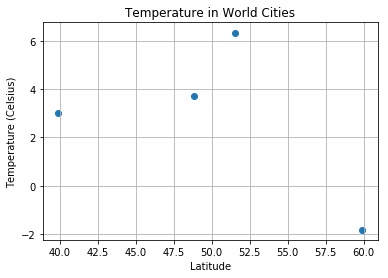

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

# TV Ratings

In [23]:
#list of tv show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash", "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

#tv maze show search base url
base_url = "http://api.tvmaze.com/search/shows?q="

#json view
example_url = base_url + "This is Us"
print(json.dumps(requests.get(example_url).json(), indent=4, sort_keys=True))

[
    {
        "score": 34.265076,
        "show": {
            "_links": {
                "nextepisode": {
                    "href": "http://api.tvmaze.com/episodes/1599392"
                },
                "previousepisode": {
                    "href": "http://api.tvmaze.com/episodes/1596864"
                },
                "self": {
                    "href": "http://api.tvmaze.com/shows/17128"
                }
            },
            "externals": {
                "imdb": "tt5555260",
                "thetvdb": 311714,
                "tvrage": null
            },
            "genres": [
                "Drama",
                "Comedy",
                "Romance"
            ],
            "id": 17128,
            "image": {
                "medium": "http://static.tvmaze.com/uploads/images/medium_portrait/168/420381.jpg",
                "original": "http://static.tvmaze.com/uploads/images/original_untouched/168/420381.jpg"
            },
            "language": "

In [41]:
#set up lists to hold response data for name and rating
show_titles = []
ratings_avg = []
networks = []

#loop through tv show titles, make requests and parse
for show in tv_shows:
    try:
        target_url = base_url + show
        response_tv = requests.get(target_url).json()
        show_titles.append(response_tv[0]['show']['name'])
        ratings_avg.append(response_tv[0]['show']['rating']['average'])
    except KeyError:
        print('Shows name not found')
    
#create dataframe
shows_df = pd.DataFrame({
    "title": show_titles,
    "rating": ratings
})

shows_df

,title,rating
0,Altered Carbon,8.1
1,Grey's Anatomy,8.4
2,This Is Us,8.2
3,The Flash,8.0
4,Vikings,8.8
5,Shameless,8.7
6,Arrow,7.5
7,Peaky Blinders,9.0
8,Dirk Gently,7.2


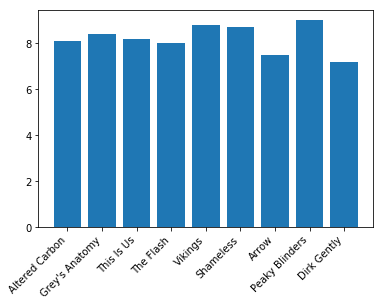

In [28]:
# create a list of numbers for x values
tick_locations = np.arange(len(shows_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, shows_df['rating'], align="center")
plt.xticks(tick_locations, shows_df['title'], rotation=45, ha="right")

plt.savefig("tv_show_ratings.png")
plt.show()

# Exception Handling

In [29]:
students = {
    # Name  : Age
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28
}

try:
    students['Who lol']
except KeyError:
    print("We don't have this person")
    
print('Next...')

We don't have this person
Next...


In [40]:
# Your assignment is to get the last line to print without changing any
# of the code below. Instead, wrap each line that throws an error in a
# try/except block.
try:
    print("Infinity looks like + " + str(10 / 0) + ".")
except ZeroDivisionError:
    print("Don't forget that we cannot divide zero lol")
    
try:
    print("I think her name was + " + name + "?")
except NameError:
    print("I don't know that variable")

try:
    print("Your name is a nonsense number. Look: " + int("Gabriel"))
except ValueError:
    print('Numbers can turn into string, but letter string cannot turn into number')

print("You made it through the gauntlet--the message survived!")

Don't forget that we cannot divide zero lol
I don't know that variable
Numbers can turn into string, but letter string cannot turn into number
You made it through the gauntlet--the message survived!


# Open Weather Wrapper
Document: https://pypi.org/project/openweathermapy/

In [45]:
#do pip install in anaconda prompt
import openweathermapy.core as owm
from config import api_key

In [61]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}

# Get current weather
current_weather_paris = owm.get_current("Paris", **settings)
print(f"Current weather object for Paris: {current_weather_paris}.")

Current weather object for Paris: {'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 3.11, 'pressure': 1032, 'humidity': 93, 'temp_min': 1, 'temp_max': 5}, 'visibility': 3700, 'wind': {'speed': 1.5, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1550800800, 'sys': {'type': 1, 'id': 6540, 'message': 0.0039, 'country': 'FR', 'sunrise': 1550817997, 'sunset': 1550856141}, 'id': 2988507, 'name': 'Paris', 'cod': 200}.


In [62]:
summary = ["name", "main.temp"]

data = current_weather_paris(*summary)
print(f"The current weather summary for Paris is: {data}.")

The current weather summary for Paris is: ('Paris', 3.11).


In [67]:
weather_cities = []
with open("cities.csv") as the_cities:
    read_cities = csv.reader(the_cities)
    cities = [city[0] for city in read_cities]
    weather_cities = [owm.get_current(city, **settings) for city in cities]
weather_cities

[{'coord': {'lon': 2.35, 'lat': 48.86},
  'weather': [{'id': 701,
    'main': 'Mist',
    'description': 'mist',
    'icon': '50n'},
   {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}],
  'base': 'stations',
  'main': {'temp': 3.11,
   'pressure': 1032,
   'humidity': 93,
   'temp_min': 1,
   'temp_max': 5},
  'visibility': 3700,
  'wind': {'speed': 1.5, 'deg': 20},
  'clouds': {'all': 0},
  'dt': 1550800800,
  'sys': {'type': 1,
   'id': 6540,
   'message': 0.0039,
   'country': 'FR',
   'sunrise': 1550817997,
   'sunset': 1550856141},
  'id': 2988507,
  'name': 'Paris',
  'cod': 200},
 {'coord': {'lon': -0.13, 'lat': 51.51},
  'weather': [{'id': 701,
    'main': 'Mist',
    'description': 'mist',
    'icon': '50n'},
   {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}],
  'base': 'stations',
  'main': {'temp': 6.49,
   'pressure': 1032,
   'humidity': 93,
   'temp_min': 4,
   'temp_max': 8},
  'visibility': 7000,
  'wind': {'speed': 3.1, 'deg': 230},
  '

In [68]:
summary_weather = ["main.temp","coord.lat","coord.lon"]
weather_extract = [cities_name(*summary_weather) for cities_name in weather_cities]
weather_extract

[(3.11, 48.86, 2.35),
 (6.49, 51.51, -0.13),
 (-1.95, 59.91, 10.74),
 (4, 39.91, 116.39),
 (-8.75, 55.75, 37.62),
 (5, 43.12, 131.89),
 (8.49, 34.7, 135.5),
 (24.92, 21.3, -157.86),
 (-11.3, 44.94, -95.72),
 (3.82, 36.19, 44.01)]

In [72]:
column_names = ["Temperature", "Latitude", "Longitude"]
weather_cities = pd.DataFrame(weather_extract, index=cities, columns=column_names)
weather_cities

,Temperature,Latitude,Longitude
Paris,3.11,48.86,2.35
London,6.49,51.51,-0.13
Oslo,-1.95,59.91,10.74
Beijing,4.00,39.91,116.39
Moscow,-8.75,55.75,37.62
Vladivostok,5.00,43.12,131.89
Osaka,8.49,34.70,135.50
Honolulu,24.92,21.30,-157.86
Montevideo,-11.30,44.94,-95.72
Erbil,3.82,36.19,44.01
